In [1]:
from IPython.core.pylabtools import figsize
from matplotlib.pyplot import title
from pandas.conftest import axis_1
from seaborn import color_palette
!pip install fredapi

In [9]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred
plt.style.use("fivethirtyeight")
pd.set_option('display.max_rows', 500)
color_palette = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [25]:
import os
secret_key = os.getenv('SECRET_KEY')

# 1. create fred object 

In [26]:
fred = Fred(api_key=secret_key)
fred

# 2. search for economic data

In [55]:
df = fred.search('S&P', limit=1000, order_by='popularity')

In [56]:
df.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-09-11   2024-09-11   
CSUSHPINSA          CSUSHPINSA     2024-09-11   2024-09-11   
SP500                    SP500     2024-09-11   2024-09-11   
MEHOINUSA672N    MEHOINUSA672N     2024-09-11   2024-09-11   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-09-11   2024-09-11   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-09-10  Daily, Close   
CSUSHPINSA            1987-01-01      2024-06-01       Monthly   
SP500                 2014-09-11      2024-09-10  Daily, Close   
MEHOINUSA672N         1984-01-01      2023-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-09-10  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-09-11 08:42:12-05:00   
CSUSHPINSA                           NSA  2024-08-27 08:12:01-05:00   
SP500                                NSA  2024-09-10 19:40:49-05:00   
MEHOINUSA672N                        NSA  2024-09-11 09:45:01-05:00   
BAMLH0A0HYM2EY                       NSA  2024-09-11 08:42:15-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

# 3. Pull raw data

In [57]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

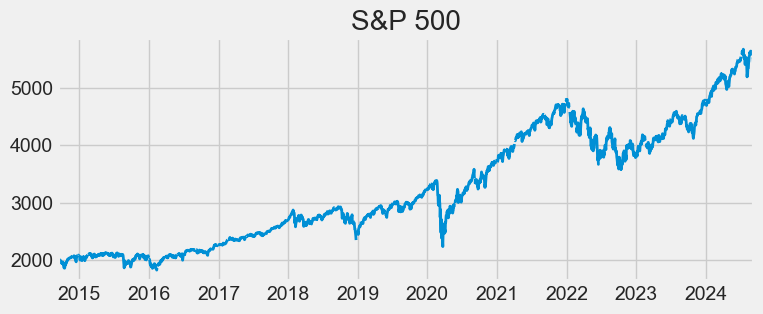

In [58]:
sp500.plot(figsize=(8, 3), title='S&P 500', lw=2)

# 4. Pull and join multiple data series

In [80]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df

id realtime_start realtime_end  \
series id                                                                
UNRATE                              UNRATE     2024-09-11   2024-09-11   
LNS14000006                    LNS14000006     2024-09-11   2024-09-11   
CAUR                                  CAUR     2024-09-11   2024-09-11   
TXUR                                  TXUR     2024-09-11   2024-09-11   
M0892AUSM156SNBR          M0892AUSM156SNBR     2024-09-11   2024-09-11   
LNS14000024                    LNS14000024     2024-09-11   2024-09-11   
LNS14000031                    LNS14000031     2024-09-11   2024-09-11   
M0892BUSM156SNBR          M0892BUSM156SNBR     2024-09-11   2024-09-11   
NYUR                                  NYUR     2024-09-11   2024-09-11   
U2RATE                              U2RATE     2024-09-11   2024-09-11   
FLUR                                  FLUR     2024-09-11   2024-09-11   
LNS14000002                    LNS14000002     2024-09-11   2024-09-11   
LNS14000009                    LNS14000009     2024-09-11   2024-09-11   
LNS14000003                    LNS14000003     2024-09-11   2024-09-11   
PAUR                                  PAUR     2024-09-11   2024-09-11   
OHUR                                  OHUR     2024-09-11   2024-09-11   
LNS14000001                    LNS14000001     2024-09-11   2024-09-11   
LNS14027660                    LNS14027660     2024-09-11   2024-09-11   
MIUR                                  MIUR     2024-09-11   2024-09-11   
LNS14027662                    LNS14027662     2024-09-11   2024-09-11   
ALUR                                  ALUR     2024-09-11   2024-09-11   
LNS14024887                    LNS14024887     2024-09-11   2024-09-11   
MAUR                                  MAUR     2024-09-11   2024-09-11   
NCUR                                  NCUR     2024-09-11   2024-09-11   
ILUR                                  ILUR     2024-09-11   2024-09-11   
NJUR                                  NJUR     2024-09-11   2024-09-11   
GAUR                                  GAUR     2024-09-11   2024-09-11   
COUR                                  COUR     2024-09-11   2024-09-11   
AZUR                                  AZUR     2024-09-11   2024-09-11   
WIUR                                  WIUR     2024-09-11   2024-09-11   
VAUR                                  VAUR     2024-09-11   2024-09-11   
KYUR                                  KYUR     2024-09-11   2024-09-11   
LRUN64TTUSM156S            LRUN64TTUSM156S     2024-09-11   2024-09-11   
SCUR                                  SCUR     2024-09-11   2024-09-11   
NMUR                                  NMUR     2024-09-11   2024-09-11   
MNUR                                  MNUR     2024-09-11   2024-09-11   
TNUR                                  TNUR     2024-09-11   2024-09-11   
LNS14032183                    LNS14032183     2024-09-11   2024-09-11   
LNS14000012                    LNS14000012     2024-09-11   2024-09-11   
WAUR                                  WAUR     2024-09-11   2024-09-11   
LNS14027659                    LNS14027659     2024-09-11   2024-09-11   
MDUR                                  MDUR     2024-09-11   2024-09-11   
ORUR                                  ORUR     2024-09-11   2024-09-11   
WVUR                                  WVUR     2024-09-11   2024-09-11   
NVUR                                  NVUR     2024-09-11   2024-09-11   
ARUR                                  ARUR     2024-09-11   2024-09-11   
OKUR                                  OKUR     2024-09-11   2024-09-11   
MOUR                                  MOUR     2024-09-11   2024-09-11   
AKUR                                  AKUR     2024-09-11   2024-09-11   
IAUR                                  IAUR     2024-09-11   2024-09-11   
UTUR                                  UTUR     2024-09-11   2024-09-11   
PRUR                                  PRUR     2024-09-11   2024-09-11   
INUR                                  INUR  

In [123]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [124]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    # time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [125]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [126]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
#change the states names
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [127]:
# Plot States Unemployment Rate
px.line(uemp_states)

# Pull Mai 2020 unemployment rate in USA

In [132]:
uemp_states

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2024-03-01         5.3    3.9       4.3      3.2           3.4   3.8   
2024-04-01         5.3    4.0       4.2      3.3           3.4   4.0   
2024-05-01         5.2    4.0       4.2      3.3           3.4   4.2   
2024-06-01         5.2    4.0       4.2      3.3           3.4   4.4   
2024-07-01         5.2    4.1       4.3      3.3           3.4   4.5   

            Michigan  Alabama  Massachusetts  North Carolina  ...  Nebraska  \
1976-01-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-02-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-03-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-04-01       9.8      6.5           10.3             6.3  ...       3.2   
1976-05-01       9.6      6.4           10.1             6.1  ...       3.1   
...              ...      ...            ...             ...  ...       ...   
2024-03-01       3.9      3.0            2.9             3.5  ...       2.5   
2024-04-01       3.9      3.1            2.9             3.5  ...       2.5   
2024-05-01       3.9      3.0            3.0             3.6  ...       2.5   
2024-06-01       4.1      2.9            3.2             3.6  ...       2.6   
2024-07-01       4.4      2.8            3.5             3.7  ...       2.6   

            Connecticut  Idaho  New Hampshire  Rhode Island  Kansas  Wyoming  \
1976-01-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-02-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-03-01          9.8    5.6            6.5           7.7     4.2      4.1   
1976-04-01          9.6    5.6            6.5           7.7     4.2      4.0   
1976-05-01          9.4    5.6            6.5           7.7     4.2      3.9   
...                 ...    ...            ...           ...     ...      ...   
2024-03-01          4.5    3.3            2.6           4.1     2.7      2.8   
2024-04-01          4.4    3.3            2.6           4.1     2.8      2.8   
2024-05-01          4.3    3.3            2.5           4.3     2.9      2.9   
2024-06-01          3.9    3.4            2.5           4.3     3.0      2.9   
2024-07-01          3.6    3.5            2.5           4.5     3.2      2.9   

            Delaware  Vermont  South Dakota  
1976-01-01       8.0      8.6           3.3  
1976-02-01       8.0      8.6           3.3  
1976-03-01       8.0      8.6           3.2  
1976-04-01       8.1      8.6           3.1  
1976-05-01       8.3      8.5           3.1  
...              ...      ...           ...  
2024-03-01       3.9      2.2           2.1  
2024-04-01       3.9      2.1           2.0  
2024-05-01       3.9      2.1           2.0  
2024-06-01       4.0      2.1           2.0  
2024-07-01       4.1      2.1           2.0  

[581 rows x 52 columns]

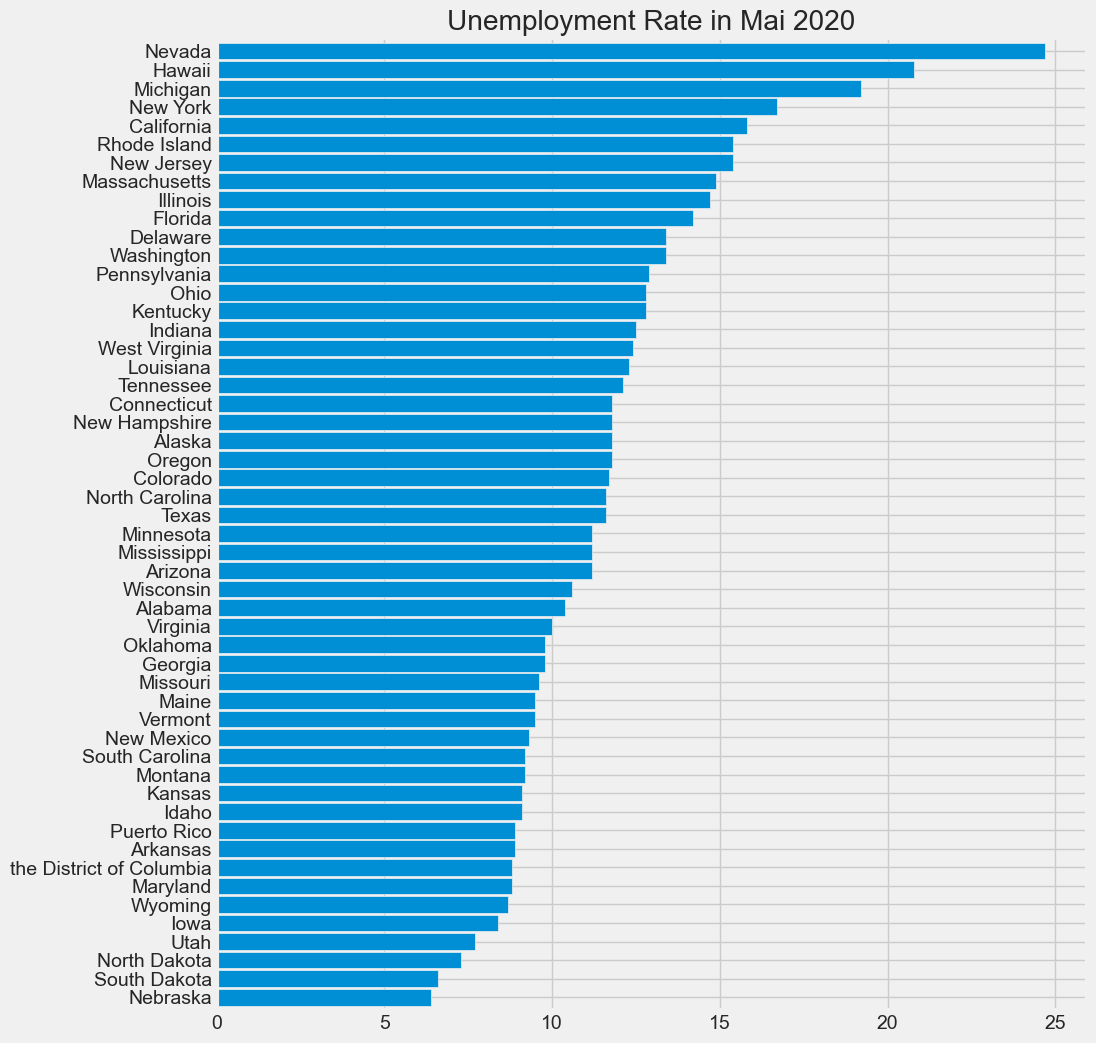

In [143]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T.sort_values('2020-05-01').plot(kind='barh',width=0.9,figsize=(10,12), title='Unemployment Rate in Mai 2020')
ax.legend().remove()
plt.show()

# Pull Participation Rate

In [146]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2024-09-11   2024-09-11   
LNS11300060          LNS11300060     2024-09-11   2024-09-11   
LNS11300002          LNS11300002     2024-09-11   2024-09-11   
LNS11300001          LNS11300001     2024-09-11   2024-09-11   
LNS11324230          LNS11324230     2024-09-11   2024-09-11   
LNS11300012          LNS11300012     2024-09-11   2024-09-11   
LNS11300006          LNS11300006     2024-09-11   2024-09-11   
LRAC25MAUSM156S  LRAC25MAUSM156S     2024-09-11   2024-09-11   
LNS11300036          LNS11300036     2024-09-11   2024-09-11   
LRAC25FEUSM156S  LRAC25FEUSM156S     2024-09-11   2024-09-11   
LNS11327662          LNS11327662     2024-09-11   2024-09-11   
LBSSA06                  LBSSA06     2024-09-11   2024-09-11   
LNS11300028          LNS11300028     2024-09-11   2024-09-11   
LNS11300031          LNS11300031     2024-09-11   2024-09-11   
LBSSA01                  LBSSA01     2024-09-11   2024-09-11   
LNS11300003          LNS11300003     2024-09-11   2024-09-11   
LNS11327660          LNS11327660     2024-09-11   2024-09-11   
LBSSA36                  LBSSA36     2024-09-11   2024-09-11   
LNS11300029          LNS11300029     2024-09-11   2024-09-11   
LBSSA26                  LBSSA26     2024-09-11   2024-09-11   
LBSSA28                  LBSSA28     2024-09-11   2024-09-11   
LNS11300009          LNS11300009     2024-09-11   2024-09-11   
LNS11300032          LNS11300032     2024-09-11   2024-09-11   
LBSSA48                  LBSSA48     2024-09-11   2024-09-11   
LBSSA12                  LBSSA12     2024-09-11   2024-09-11   
LBSSA21                  LBSSA21     2024-09-11   2024-09-11   
LBSSA39                  LBSSA39     2024-09-11   2024-09-11   
LBSSA55                  LBSSA55     2024-09-11   2024-09-11   
LBSSA42                  LBSSA42     2024-09-11   2024-09-11   
LBSSA25                  LBSSA25     2024-09-11   2024-09-11   
LBSSA27                  LBSSA27     2024-09-11   2024-09-11   
LBSSA24                  LBSSA24     2024-09-11   2024-09-11   
LBSSA54                  LBSSA54     2024-09-11   2024-09-11   
LBSSA47                  LBSSA47     2024-09-11   2024-09-11   
LNS11327659          LNS11327659     2024-09-11   2024-09-11   
LBSSA23                  LBSSA23     2024-09-11   2024-09-11   
LBSSA17                  LBSSA17     2024-09-11   2024-09-11   
LBSSA37                  LBSSA37     2024-09-11   2024-09-11   
LBSSA13                  LBSSA13     2024-09-11   2024-09-11   
LBSSA22                  LBSSA22     2024-09-11   2024-09-11   
LBSSA45                  LBSSA45     2024-09-11   2024-09-11   
LBSSA08                  LBSSA08     2024-09-11   2024-09-11   
LBSSA49                  LBSSA49     2024-09-11   2024-09-11   
LBSSA51                  LBSSA51     2024-09-11   2024-09-11   
LBSSA18                  LBSSA18     2024-09-11   2024-09-11   
LNS11300026          LNS11300026     2024-09-11   2024-09-11   
LBSSA29                  LBSSA29     2024-09-11   2024-09-11   
LRIN64TTUSM156S  LRIN64TTUSM156S     2024-09-11   2024-09-11   
LBSSA34                  LBSSA34     2024-09-11   2024-09-11   
LRAC64TTUSM156S  LRAC64TTUSM156S     2024-09-11   2024-09-11   
LBSSA19                  LBSSA19     2024-09-11   2024-09-11   
LBSSA02                  LBSSA02     2024-09-11   2024-09-11   
LNS11300025          LNS11300025     2024-09-11   2024-09-11   
LBSSA53                  LBSSA53     2024-09-11   2024-09-11   
LBSSA04                  LBSSA04     2024-09-11   2024-09-11   
LBSSA35                  LBSSA35     2024-09-11   2024-09-11   
LNS11327689          LNS11327689     2024-09-11   2024-09-11   
LBSSA16                  LBSSA16     2024-09-11   2024-09-11   
LBSSA05                  LBSSA05     2024-09-11   2024-09-11   
LBSSA40                  LBSSA40     2024-09-11   2024-09-11   
LBSSA31                  LBSSA31     2024-09-11   2024-09-11  

In [153]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    # time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# Plot Unemployment vs Participation for each state!

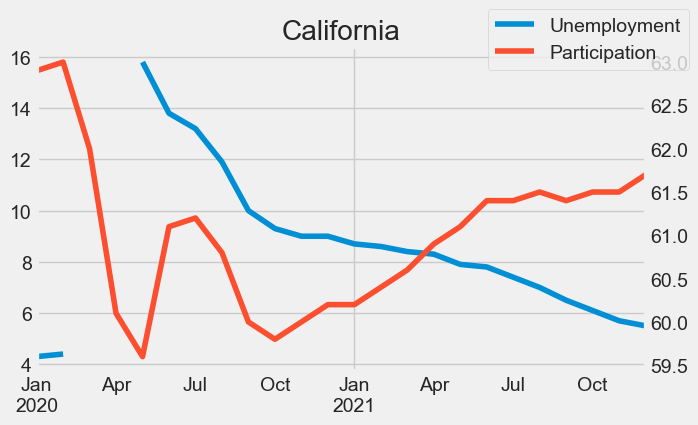

In [167]:
state = 'California'
fig, ax = plt.subplots(figsize=(7, 4), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_palette[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()

In [168]:
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})


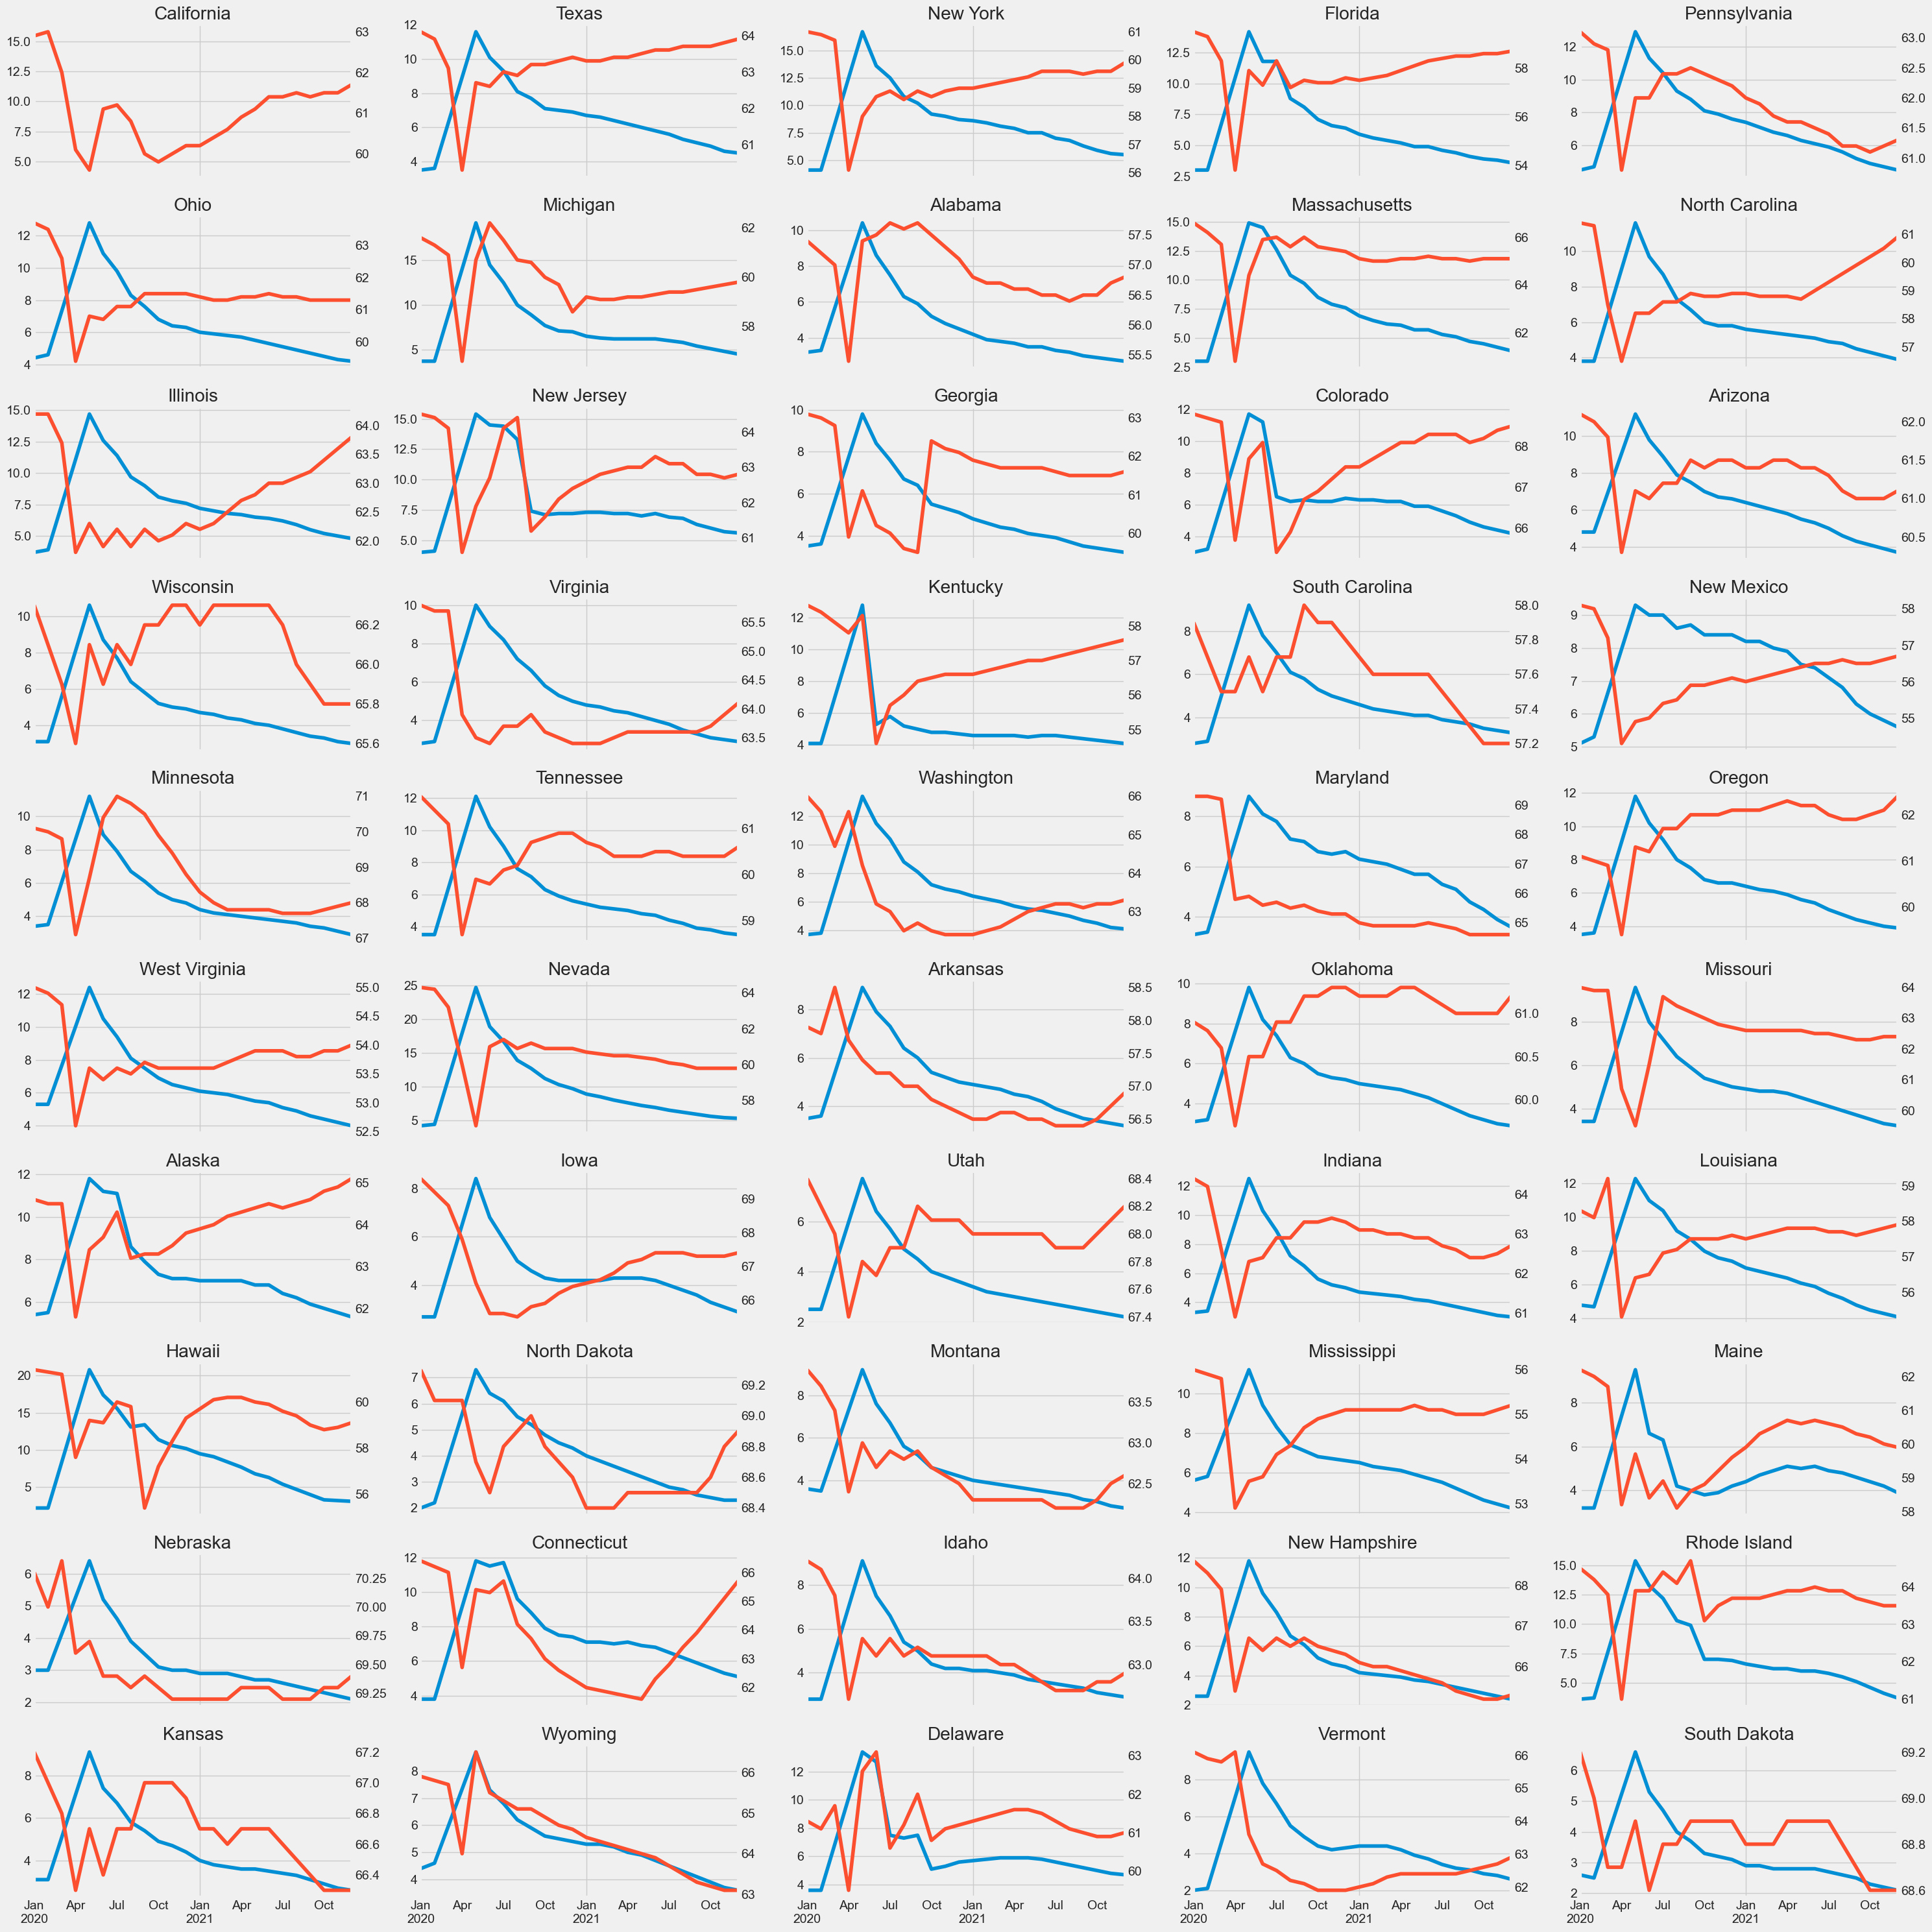

In [169]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_palette[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()